In [1]:
import pandas as pd

data = pd.read_csv(r"C:\Users\karim\Downloads\data (2).csv")
genre_data = pd.read_csv(r"C:\Users\karim\Downloads\data_by_genres.csv")
year_data=pd.read_csv(r"C:\Users\karim\Downloads\data_by_year.csv")
artist_data=pd.read_csv(r"C:\Users\karim\Downloads\data_by_artist.csv")

In [2]:
data["decade"] = data["year"].apply(lambda x: f"{(x // 10) * 10}s")

In [16]:
###Genre cluster

In [15]:
genre_data

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,cluster
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6,4
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5,10
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7,3
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7,8
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9,3
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5,3
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7,5


In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# --------- Load your data ---------
# If you already have df, ignore this.
# Example: df = pd.read_csv("your_file.csv")

# --------- Prepare features ---------
# Drop columns that aren't numeric (like 'genres')
X = genre_data.drop(columns=['genres'])

# Scale features so KMeans isn't dominated by huge numbers (duration, loudness)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------- K-Means clustering ---------
kmeans = KMeans(n_clusters=12, random_state=42, n_init=10)
genre_data['cluster'] = kmeans.fit_predict(X_scaled)


# --------- Results ---------
print(genre_data[['genres', 'cluster']].head(20))  # peek at genres vs clusters
print("\nCluster centers (scaled):")
print(kmeans.cluster_centers_)

# If you want the counts per cluster
print("\nCluster distribution:")
print(genre_data['cluster'].value_counts())

                    genres  cluster
0   21st century classical        2
1                    432hz        6
2                    8-bit        9
3                       []        7
4               a cappella        1
5                 abstract        0
6           abstract beats        9
7         abstract hip hop        4
8                accordeon       10
9                accordion        7
10              acid house        3
11               acid rock        4
12             acid trance        9
13              acousmatic        2
14          acoustic blues        7
15            acoustic pop        1
16           acoustic punk        9
17           acoustic rock        1
18             action rock        3
19               adoracion        1

Cluster centers (scaled):
[[ 1.39690955e-01 -7.58998016e-01  8.17035852e-02  7.78093917e-01
   4.67158114e-01  1.66992780e+00 -1.14298109e-01  1.42025889e-01
  -2.45302954e-01  8.43554549e-02 -6.05629443e-01 -4.26077883e-01
  -1.92771047e-01]


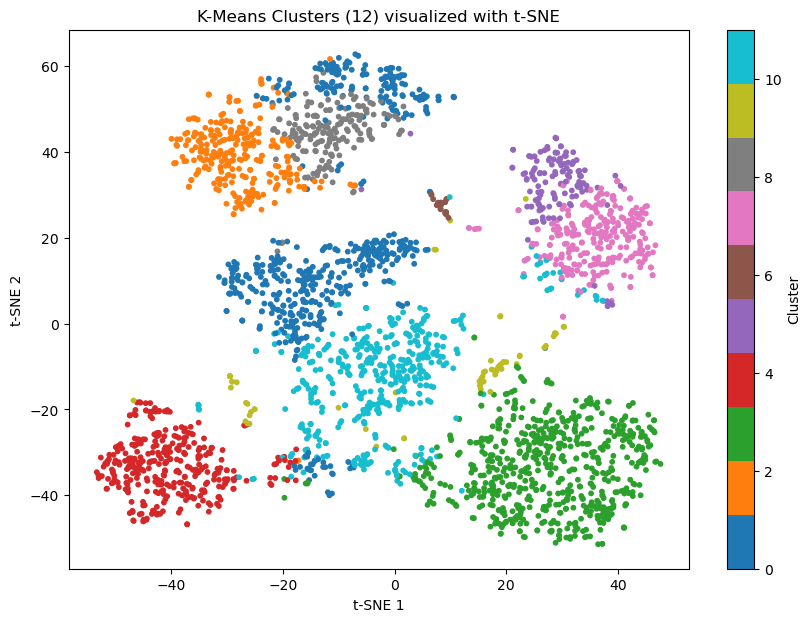


Cluster distribution:
cluster
3     649
11    458
0     386
4     346
2     279
7     276
8     186
1     167
5     135
9      63
6      22
10      6
Name: count, dtype: int64


In [10]:
tsne = TSNE(
    n_components=2,
    random_state=42,
    perplexity=30,
    max_iter=1000
)
X_embedded = tsne.fit_transform(X_scaled)

# --------- Plot clusters ---------
plt.figure(figsize=(10, 7))
scatter = plt.scatter(
    X_embedded[:, 0],
    X_embedded[:, 1],
    c=genre_data['cluster'],
    cmap='tab10',
    s=10
)
plt.title("K-Means Clusters (12) visualized with t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(scatter, label='Cluster')
plt.show()

# --------- Optional: check cluster distribution ---------
print("\nCluster distribution:")
print(genre_data['cluster'].value_counts())

In [12]:
for c in range(12):
    print(f"\nCluster {c} genres:")
    print(genre_data[genre_data['cluster'] == c]['genres'].value_counts().head(10))


Cluster 0 genres:
genres
wu fam              1
abstract hip hop    1
techno kayo         1
teen pop            1
texas blues         1
traditional ska     1
trap                1
trap chileno        1
trap latino         1
trap queen          1
Name: count, dtype: int64

Cluster 1 genres:
genres
afghan traditional           1
american folk revival        1
american modern classical    1
arab folk                    1
audiophile vocal             1
austro-german modernism      1
avant-garde jazz             1
baglama                      1
ballroom                     1
bandinhas                    1
Name: count, dtype: int64

Cluster 2 genres:
genres
yorkshire folk           1
a cappella               1
acoustic pop             1
acoustic rock            1
adoracion                1
alternative americana    1
alternative country      1
ambient folk             1
ambient worship          1
ann arbor indie          1
Name: count, dtype: int64

Cluster 3 genres:
genres
zydeco            

In [14]:
cluster_summary = genre_data.groupby('cluster').mean(numeric_only=True)
print(cluster_summary)

             mode  acousticness  danceability   duration_ms    energy  \
cluster                                                                 
0        1.000000      0.196804      0.636361  2.455334e+05  0.685586   
1        0.982036      0.831163      0.458451  2.298950e+05  0.292077   
2        1.000000      0.558966      0.531397  2.397927e+05  0.423697   
3        1.000000      0.267652      0.637219  2.371802e+05  0.656687   
4        0.913295      0.855531      0.326235  2.878038e+05  0.178740   
5        0.000000      0.598351      0.529384  2.397591e+05  0.418311   
6        0.727273      0.700840      0.608907  3.018953e+05  0.358397   
7        0.000000      0.183424      0.634350  2.494274e+05  0.716688   
8        1.000000      0.738121      0.582690  1.969467e+05  0.414448   
9        0.761905      0.395179      0.515453  3.020447e+05  0.612470   
10       0.666667      0.793797      0.342936  1.558904e+06  0.308902   
11       0.936681      0.084448      0.430817  2.66

In [18]:
genre_data.to_csv("genre_clusters.csv", index=False)